I have writes here a code to do a **very fast k-means clustering algorithm** useful for  large dataset , with an implementation using complex numbers, It Can be used  like example to obtain the specific anchors to your dataSet to train using **Yolo** architectures ,techniques .
For Yolo **k= 5** the Program run in the **set of width *and* height** gived as a complex number : `width + 1j * height`


#Dependencies

In [0]:
import numpy as np 
import copy
import matplotlib.pyplot as plt

#Helpers Functions
Used an the algorithme of k-means clustering

In [0]:
# centroid  1D  array of complex numbers with a len equall to the number of clusters 
# points = np.array([2+1j 3+1j -2+1j 0+1j])

def compute_distance(points ,centroid):
  centroid,points = np.meshgrid(centroid,points)
  euclidian_distances = np.abs(points-centroid)
  return euclidian_distances

def compute_clusters_sets(euclidian_distances):
     indexes  = np.argmin(euclidian_distances,axis = 1)
     nb_clusters = euclidian_distances.shape[1]
     H = [[] for _ in range(nb_clusters)]
     for m,k in enumerate(indexes):
       H[k].append(points[m]) 
     return H     

def update_centroid(clusters_sets):
  centroid = []
  for ens_list in clusters_sets:  # set of sets (cluster)
    mat = np.array(ens_list)
    centroid.append(np.mean(mat))
  return np.array(centroid)

def get_data_points(size_data,uniform =False,alpha=2):
  if uniform:
    return alpha*np.random.rand(size_data)+1j*alpha*np.random.rand(size_data)
  else: 
    normal = np.random.randn(size_data//3) + 1j* np.random.randn(size_data//3)
    uniform = (1+2*np.random.rand(size_data//3)) + 1j*(1+2*np.random.rand(size_data//3))
    other = 2*(2+2*np.random.randn(size_data//3)) + 1j* (2+2*np.random.randn(size_data//3)) 
    return np.random.permutation(np.vstack((normal,uniform,other)).ravel())

def compute_variance(clusters_sets,centroid):
  clusters_variances = []
  for k,cluster in enumerate(clusters_sets):
    cluster_var = np.mean(np.abs((np.array(cluster)-centroid[k]))**2)
    clusters_variances.append(cluster_var)
  return clusters_variances
 
def plot_partitions_centroid(clusters_sets,fig,centroid):
  ax_1 = fig_1.add_subplot(1,1,1)
  color ={0:'m.',1:'b.',2:'g.',3:'c.',4:'y.',5:'k.'}
  for c, ens in enumerate(clusters_sets) :
    b = np.array(ens)
    ax_1.plot(b.real,b.imag,color[c])
    
  ax_1.plot(centroid.real,centroid.imag,'r*',markersize= 15)
  
  
      


#Generate data


In [0]:
# K means clusterins 
Nbr_Points = 1000
points = get_data_points(Nbr_Points,uniform=True)

#RUN the k-means clustering 


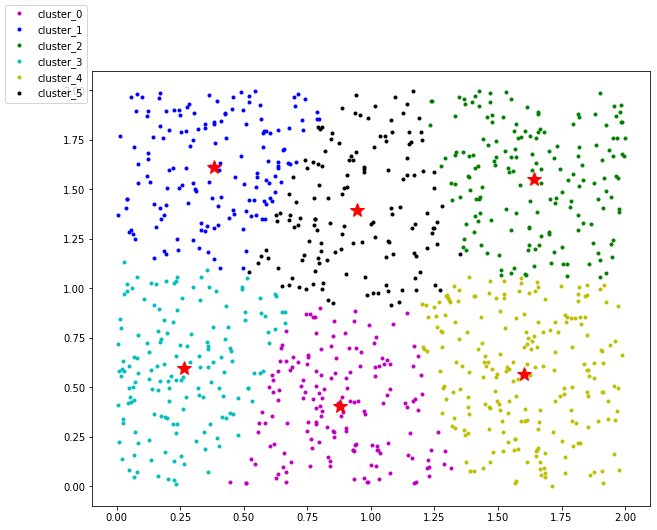

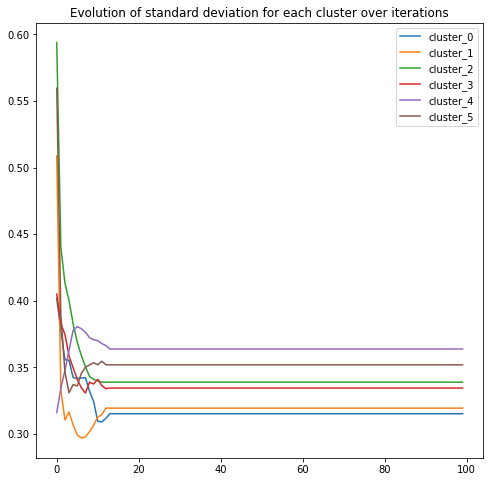

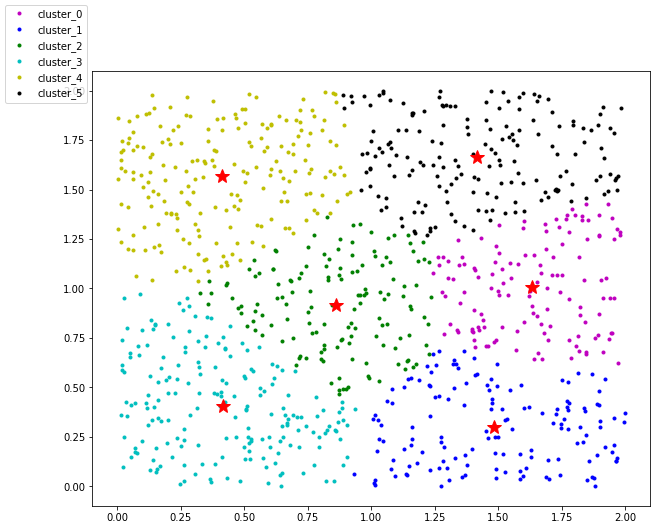

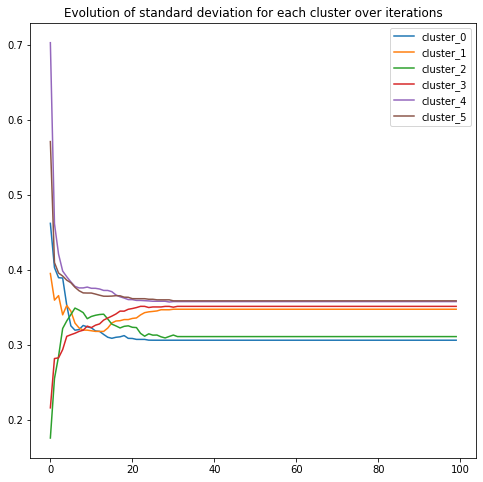

In [12]:
nbr_clusters =6
nbr_iteration = 100

def main(nbr_iteration):
   mm = np.random.permutation(list(range(nbr_clusters)),)
   centroid = np.array([points[mm[k]] for k in range(nbr_clusters)])
   variances = []
   for it in range(nbr_iteration):
    distance = compute_distance(points ,centroid)
    H =compute_clusters_sets(distance)
    var = compute_variance(H,centroid)
    variances.append(var)
    new_centroid = update_centroid(H)
    centroid = new_centroid
   return H,np.array(variances),centroid

H,V,centroid=main(nbr_iteration)
fig_1 = plt.figure(1,figsize=(10,8))
plot_partitions_centroid(H,fig_1,centroid)
fig_1.legend(['cluster_'+str(k) for k in range(V.shape[1])],loc='upper left')

fig_2 = plt.figure(figsize=(8,8))
ax_2 = fig_2.add_subplot(1,1,1)
ax_2.plot(np.sqrt(V))
ax_2.set_title('Evolution of standard deviation for each cluster over iterations')
ax_2.legend(['cluster_'+str(k) for k in range(V.shape[1])],loc='upper right')